<a href="https://colab.research.google.com/github/gpasxos/large-scale-optimization/blob/main/ch03_waterfilling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Noise levels: [0.25 0.6  0.4  1.25 0.75 0.15 0.9  1.  ]
Optimal allocation: [1.037 0.688 0.887 0.038 0.538 1.138 0.388 0.288]
Water level: 1.288
Total power: 5.000
Total rate: 6.902

KKT verification:
 Channel 0: p=1.037, N+p=1.287, should equal 1/mu=1.288
 Channel 1: p=0.688, N+p=1.288, should equal 1/mu=1.288
 Channel 2: p=0.887, N+p=1.287, should equal 1/mu=1.288
 Channel 3: p=0.038, N+p=1.288, should equal 1/mu=1.288
 Channel 4: p=0.537, N+p=1.288, should equal 1/mu=1.288
 Channel 5: p=1.137, N+p=1.287, should equal 1/mu=1.288
 Channel 6: p=0.388, N+p=1.288, should equal 1/mu=1.288
 Channel 7: p=0.288, N+p=1.288, should equal 1/mu=1.288


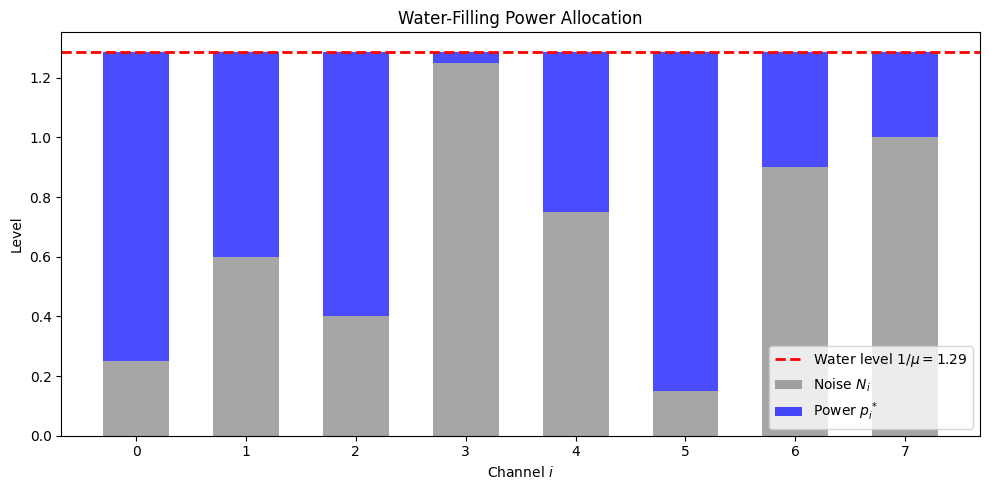

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def water_filling(N, P):
    """
    Solve the water-filling problem.
    N: array of noise levels
    P: total power budget
    Returns: optimal power allocation
    """
    n = len(N)

    # Binary search on water level directly
    W_low = min(N)       # At this level, no power allocated
    W_high = max(N) + P  # Upper bound: enough to cover all channels

    for _ in range(100):  # Sufficient iterations for convergence
        W = (W_low + W_high) / 2
        p = np.maximum(0, W - N)
        total_power = np.sum(p)

        if total_power > P:
            W_high = W
        else:
            W_low = W

    water_level = W
    p_opt = np.maximum(0, water_level - N)

    # Small adjustment to exactly meet power constraint
    if np.sum(p_opt) > 0:
        p_opt = p_opt * P / np.sum(p_opt)

    return p_opt, water_level

# Example
np.random.seed(44)
n = 8
N = 0.5 * np.array([0.5, 1.2, 0.8, 2.5, 1.5, 0.3, 1.8, 2.0])
P = 5.0

p_opt, water_level = water_filling(N, P)

print("Noise levels:", N)
print("Optimal allocation:", np.round(p_opt, 3))
print(f"Water level: {water_level:.3f}")
print(f"Total power: {np.sum(p_opt):.3f}")
print(f"Total rate: {np.sum(np.log(1 + p_opt/N)):.3f}")

# Verify KKT conditions
print("\nKKT verification:")
for i in range(n):
    if p_opt[i] > 1e-6:
        print(f" Channel {i}: p={p_opt[i]:.3f}, N+p={N[i]+p_opt[i]:.3f}, " +
            f"should equal 1/mu={water_level:.3f}")
    else:
        print(f" Channel {i}: p=0, N={N[i]:.3f} > water_level={water_level:.3f}")

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(n)
width = 0.6

ax.bar(x, N, width, label='Noise $N_i$', color='gray', alpha=0.7)
ax.bar(x, p_opt, width, bottom=N, label='Power $p_i^*$', color='blue', alpha=0.7)
ax.axhline(y=water_level, color='red', linestyle='--', linewidth=2, label=f'Water level $1/\\mu = {water_level:.2f}$')

ax.set_xlabel('Channel $i$')
ax.set_ylabel('Level')
ax.set_title('Water-Filling Power Allocation')
ax.legend()
ax.set_xticks(x)

plt.tight_layout()
plt.savefig('water_filling.pdf', bbox_inches='tight')
plt.show()